In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle.json'

In [ ]:
os.environ['KAGGLE_USERNAME'] = "username"
os.environ['KAGGLE_KEY'] = "your-key-here"

In [ ]:
pwd

'/content'

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 607M/612M [00:05<00:00, 63.8MB/s]
100% 612M/612M [00:05<00:00, 124MB/s] 


In [ ]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split  # Fixed import statement
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # Changed MaxPool2D to MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))  # Corrected path joining
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Corrected path joining
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
eps = 20
history = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/20
981/981 [==============================] - 19s 7ms/step - loss: 1.8013 - accuracy: 0.5535 - val_loss: 0.2470 - val_accuracy: 0.9355
Epoch 2/20
981/981 [==============================] - 7s 7ms/step - loss: 0.4178 - accuracy: 0.8869 - val_loss: 0.1248 - val_accuracy: 0.9736
Epoch 3/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2678 - accuracy: 0.9297 - val_loss: 0.0830 - val_accuracy: 0.9760
Epoch 4/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2263 - accuracy: 0.9400 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 5/20
981/981 [==============================] - 6s 7ms/step - loss: 0.2119 - accuracy: 0.9453 - val_loss: 0.0398 - val_accuracy: 0.9898
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1773 - accuracy: 0.9553 - val_loss: 0.1299 - val_accuracy: 0.9606
Epoch 7/20
981/981 [==============================] - 6s 6ms/step - loss: 0.1801 - accuracy: 0.9547 - val_loss: 0.0413 - val_accuracy: 0.9911
Epoch

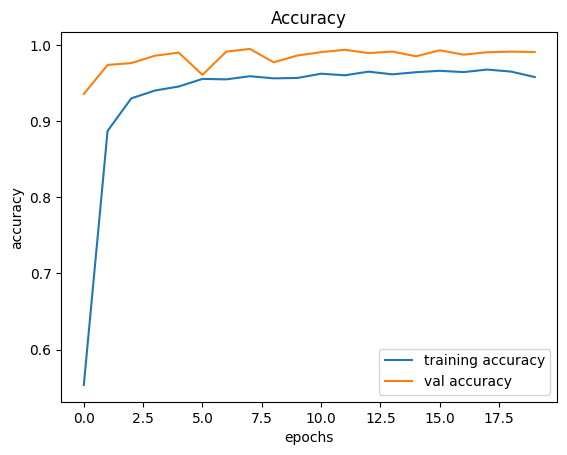

In [ ]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Load the test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []

# Load and preprocess test images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

# Predict using the model
predicted_probabilities = model.predict(X_test)
pred = np.argmax(predicted_probabilities, axis=1)  # Get the class labels

# Calculate and print accuracy
test_accuracy = accuracy_score(labels, pred)
print("Test accuracy:", test_accuracy)

395/395 [==============================] - 2s 3ms/step
Test accuracy: 0.9604117181314331
